In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.image as mp

In [23]:

from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [24]:
with open('/content/drive/My Drive/train/teltrain.txt') as file:
    tel_txt = file.read().split('\n')
with open('/content/drive/My Drive/train/engtrain.txt') as file:
    eng_txt = file.read().split('\n')
with open('/content/drive/My Drive/train/trainimages.txt') as file:
   trainimages = file.read().split('\n')


In [25]:
train_images=trainimages[25001:]

In [26]:
img_path=[]
for s in train_images:
    img_path.append("/content/drive/My Drive/trainimg/"+s+".jpg")

In [27]:
len(train_images)

3928

In [28]:
len(eng_txt)

28929

In [29]:
len(tel_txt)

28930

In [30]:
len(img_path)

3928

/content/drive/My Drive/trainimg/2402428.jpg
tel:మనిషికి నల్లటి జుట్టు ఉంది
eng:Man has dark hair


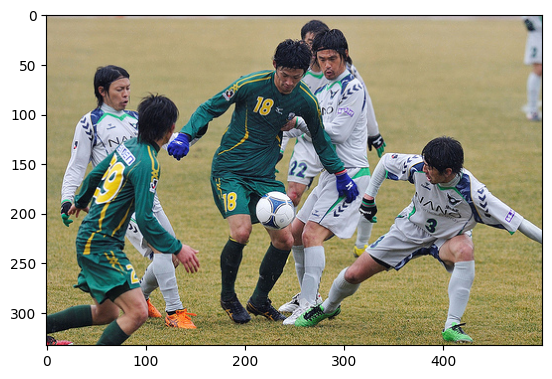

In [31]:
im=mp.imread(img_path[2])
plt.imshow(im)
print(img_path[2])
print("tel:"+tel_txt[25003])
print("eng:"+eng_txt[25003])

In [32]:
import pandas as pd
df = pd.read_csv ('/content/drive/My Drive/train/traincrop.csv')
print(df)

         X    Y    W    H
0       45   30  545  436
1      306  239  189   94
2      664  241   93  126
3        1  113  120  138
4      105  178  148  209
...    ...  ...  ...  ...
28924   63   90  363  335
28925   47   81  282  393
28926  331   71  117   57
28927  273   34  211  165
28928  348  156   12   12

[28929 rows x 4 columns]


In [33]:
from keras.applications import ResNet50
from keras.models import Model

model_resnet = ResNet50(include_top=True, weights="imagenet")
model_resnet.layers.pop()
model_resnet = Model(inputs=model_resnet.inputs, outputs=model_resnet.layers[-2].output)
model_resnet.summary()


102967424/102967424 [==============================] - 4s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                       

In [34]:
from keras.applications import InceptionV3
from keras.models import Model

model_inc = InceptionV3(include_top=True, weights="imagenet")
model_inc.layers.pop()
model_inc = Model(inputs=model_resnet.inputs, outputs=model_resnet.layers[-2].output)
model_inc.summary()

96112376/96112376 [==============================] - 4s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                       

In [35]:
dfnew=df[25001:]

In [36]:
import cv2

In [37]:
dfnew

,X,Y,W,H
25001,124,343,79,82
25002,129,107,368,385
25003,376,120,63,53
25004,33,95,67,175
25005,191,165,270,154
...,...,...,...,...
28924,63,90,363,335
28925,47,81,282,393
28926,331,71,117,57
28927,273,34,211,165


In [38]:
splits=len(dfnew)
dfnew=df[25001:]
imagedata=np.zeros(shape=(splits,224,224,3))
for i in range(splits):
    temp=mp.imread(img_path[i])
    X=dfnew['X'].values[i]
    Y=dfnew['Y'].values[i]
    W=dfnew['W'].values[i]
    H=dfnew['H'].values[i]
    temp = temp[Y:Y+int(H), X:X+W]
    if (len(temp.shape)==3):
      try:
         temp=cv2.resize(temp,(224,224))
         imagedata[i]=temp
      except:
        break
    elif (len(temp.shape)<3):
       #plt.imshow(temp)
       temp=cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
       temp=cv2.resize(temp,(224,224))
       imagedata[i]=temp
imagedata=imagedata/255
imagedata=imagedata.astype(np.float16)

In [39]:
imagedata[1]

array([[[0.4    , 0.3843 , 0.3333 ],
        [0.5137 , 0.5215 , 0.443  ],
        [0.6    , 0.5605 , 0.443  ],
        ...,
        [0.255  , 0.3293 , 0.298  ],
        [0.2903 , 0.3843 , 0.3882 ],
        [0.6157 , 0.651  , 0.5845 ]],

       [[0.204  , 0.204  , 0.149  ],
        [0.357  , 0.3804 , 0.251  ],
        [0.443  , 0.4158 , 0.2825 ],
        ...,
        [0.1451 , 0.2432 , 0.2313 ],
        [0.3608 , 0.5527 , 0.5293 ],
        [0.3293 , 0.3804 , 0.3333 ]],

       [[0.537  , 0.5566 , 0.4236 ],
        [0.3372 , 0.349  , 0.1921 ],
        [0.706  , 0.5806 , 0.4785 ],
        ...,
        [0.2705 , 0.3372 , 0.3215 ],
        [0.718  , 0.698  , 0.741  ],
        [0.306  , 0.3804 , 0.357  ]],

       ...,

       [[0.1843 , 0.2354 , 0.2705 ],
        [0.1804 , 0.2196 , 0.2471 ],
        [0.1255 , 0.1608 , 0.1765 ],
        ...,
        [0.7803 , 0.639  , 0.6196 ],
        [0.6704 , 0.7607 , 0.639  ],
        [0.357  , 0.396  , 0.3687 ]],

       [[0.051  , 0.0745 , 0.0902 ],
  

In [41]:
#preprocessing images
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.resnet50 import preprocess_input as pre1
from keras.applications.inception_v3 import preprocess_input as pre2
from collections import OrderedDict
jpgs=img_path[:splits]
images_new = OrderedDict()
images_newv = OrderedDict()
npix = 224
target_size = (npix,npix,3)
for i,name in enumerate(jpgs):
    filename = name
    image = load_img(filename, target_size=target_size)
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    nimage = pre1(image)
    nimagev = pre2(image)
    y_pred = model_resnet.predict(nimage.reshape( (1,) + nimage.shape[:3]))
    images_new [name] = y_pred.flatten()
    y_predv = model_inc.predict(nimagev.reshape( (1,) + nimagev.shape[:3]))
    images_newv [name] = y_predv.flatten().reshape((7, 7, 2048))
    if i%200==0:
        print(i,filename)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 192ms/step
1600 /content/drive/My Drive/trainimg/2408813.jpg
1/1 [==============================] - 0s 345ms/step
1800 /content/drive/My Drive/trainimg/2409572.jpg
1/1 [==============================] - 0s 202ms/step
2000 /content/drive/My Drive/trainimg/2410354.jpg
1/1 [==============================] - 0s 224ms/step
2200 /content/drive/My Drive/trainimg/2411117.jpg
1/1 [==============================] - 0s 200ms/step
2400 /content/drive/My Drive/trainimg/2411966.jpg
1/1 [==============================] - 0s 231ms/step
2600 /content/drive/My Drive/trainimg/2412740.jpg
1/1 [==============================] - 0s 228ms/step
2800 /content/drive/My Drive/trainimg/2413513.jpg
1/1 [==============================] - 0s 209ms/step
3000 /content/drive/My Drive/trainimg/2414334.jpg
1/1 [==============================] - 0s 202ms/step
3200 /content/drive/My Drive/trainimg/2415150.jpg
1/1 [=================

In [42]:
inc_feature=np.zeros(shape=(len(jpgs), 7, 7, 2048))
for i in range(len(jpgs)):
    inc_feature[i]=images_newv[jpgs[i]]

In [43]:
resnet_feature=np.zeros(shape=(len(jpgs), 7, 7, 2048))
for i in range(len(jpgs)):
    resnet_feature[i]=images_new[jpgs[i]]

In [44]:
import numpy as np

In [45]:
np.save('/content/drive/My Drive/trainfeature.npy', resnet_feature )

In [46]:
np.save('/content/drive/My Drive/vtrainfeature.npy', inc_feature )

In [47]:
np.save('/content/drive/My Drive/traindata.npy', imagedata)